# Simple Linear Regression

### Import packages

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Read data

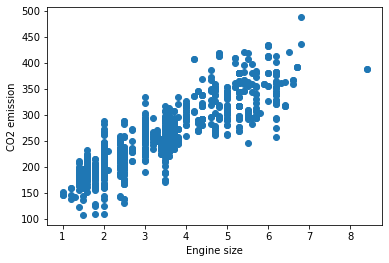

In [17]:
df = pd.read_csv("./Data/FuelConsumptionCo2.csv")
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

### Modelling
Extract training (80%) and testing (20%) set

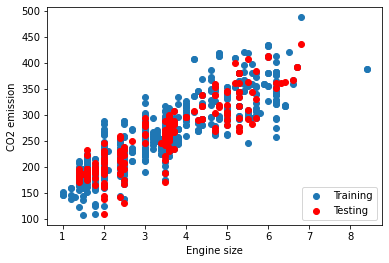

In [31]:
# create an array with random numbers from 0 - 1
# return true if number < 0.8 
# since randomly generated, about 80% true
mask = np.random.rand(len(df))  < 0.8 
train = df[mask]
test = df[~mask]

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, label="Training")
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="red", label="Testing")
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.legend(loc="lower right")
plt.show()

Modelling

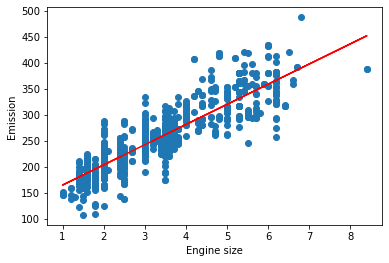

In [42]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(train_x, train_y)

m, c = regression.coef_, regression.intercept_

plt.scatter(train_x, train_y)
plt.plot(train_x, m * train_x + c, color="red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Evaluation

In [59]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
predict_y = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Mean square error: %.2f" % np.mean((predict_y - test_y)**2))
print("R2-score %.2f" % r2_score(test_y, predict_y))

Mean absolute error: 21.68
Mean square error: 857.30
R2-score 0.80
